### K-최근접 이웃: 게으른 알고리즘

K-최근접 이웃(K-Nearest Neighbor, KNN) 알고리즘은 훈련 데이터에서 판별 함수를 학습하는 다른 알고리즘과는 달리 훈련 데이터셋을 메모리에 저장한다.
훈련 데이터셋을 메모리에 저장하기 때문에 학습 과정에 비용이 전혀 들지 않는 게으른 학습기이다. KNN에 대한 원리는 다음 영상을 참고하자.

[kNN(k-Nearest Neighbors) 최근접 이웃 알고리즘](https://youtu.be/CyuI2F_wJWw)

KNN 알고리즘은 다음같은 단계로 진행한다.

1. 숫자 k와 거리 측정 기준을 선택한다.
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통해 클래스 레이블을 할당한다.


- 장점: 훈련 데이터에 즉시 적응이 가능함
- 단점: 
  - 새로운 샘플을 분류하는 계산 복잡도가 높음
    - 효율적인 데이터 구조로 구현되어있지 않으면 샘플 개수에 선형적으로 계산 복잡도 증가함
    - 대규모 데이터셋에서 저장하면 메모리 저장 공간에 문제가 생김
    
유클리디안 거리 측정 방식을 사용한 KNN 모델은 다음과 같다.  

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()     # 붓꽃 데이터 로드
x = iris.data[:, [2, 3]]        # 꽃잎길이, 꽃잎너비 특성을 x에 할당
y = iris.target                 # 꽃 품종에 해당하는 클래스 레이블을 y에 할당
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()   # 특성 표준화(스케일 조정)을 위해서 StandardScaler 클래스를 사용
sc.fit(x_train)         # fit 함수는 각 특성의 차원마다 평균과 표준편차를 계산한다.
x_train_std = sc.transform(x_train) # transform 함수는 평균과 표준편차를 사용해서 특성을 표준화한다.
x_test_std = sc.transform(x_test)   # 테스트 세트도 같은 비율로 이동(표준화)되도록 같은 평균과 표준편차를 사용한다.
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
  

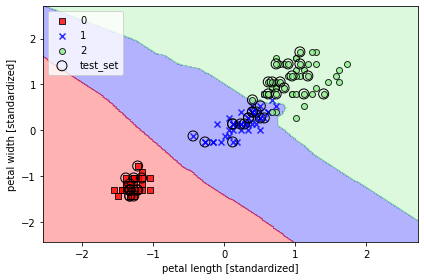

In [2]:
from common import utils
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 적절한 n_neighbors(k)를 선택하는 것이 overfitting과 underfitting 사이에서 올바른 균형을 잡기 위해 중요하다.
# p == 1 ? 맨해튼 거리
# p == 2 ? 유클리디안 거리
# minkowski는 유클리디안 거리와 맨해튼 거리를 일반화한 것 
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)

utils.plot_decision_regions(x_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

유클리디안 거리를 사용하려면 각 특성이 동일하게 취급되도록 표준화를 하는 것이 중요하다.<br>
데이터셋의 특성에 맞는 거리 측정 지표를 선택해야 한다.<br>
예를들어 붓꽃 데이터처럼 실수 값을 가진 특성에는 보통 유클리디안 거리를 사용한다.<br>

차원의 저주는 고정된 크기의 훈련 데이터셋이 차원이 늘어남에 따라 특성 공간이 희소해지는 현상이다.<br>
KNN은 정규화를 적용할 수 없기 때문에 특성 선택과 차원 축소 기법을 사용해서 차원의 저주를 피한다.<br>
